<a href="https://colab.research.google.com/github/rajansingh387/customer_satisfaction_project/blob/main/customer_satisfaction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

# The above code mounts your Google Drive account to the Colab environment.
# Once mounted, you can access your Google Drive files and folders using the path "/content/gdrive/".



Mounted at /content/gdrive


In [3]:
train_df = pd.read_csv('/content/gdrive/My Drive/cust_satisfaction_train.csv')

# read the CSV file "cust_satisfaction_train.csv" located in the "My Drive" folder of your Google Drive.



In [4]:
test_df = pd.read_csv('/content/gdrive/My Drive/cust_satisfaction_test.csv')
# read the CSV file "cust_satisfaction_train.csv" located in the "My Drive" folder of your Google Drive.


In [5]:
# Print the count of unique data types present in the columns of the train_df DataFrame
print(train_df.dtypes.value_counts())

int64      260
float64    111
dtype: int64


In [6]:
# Print the data types of the train_df and test_df DataFrames
print(type(train_df))
print(type(test_df))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
# Print the first few rows of the train_df DataFrame
train_df.head()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
# Print the first few rows of the test_df DataFrame
test_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [9]:
# Print the shape of the train_df and test_df DataFrames
print(train_df.shape)
print(test_df.shape)


(76020, 371)
(75818, 370)


In [10]:
# Calculate the number of missing values in train_df DataFrame
nv = train_df.isnull().sum()

# Filter the missing values to include only columns with non-zero counts
nv = nv[nv > 0]
print(nv)


Series([], dtype: int64)


In [11]:
# Calculate the number of missing values in test_df DataFrame
nv1 = test_df.isnull().sum()

# Filter the missing values to include only columns with non-zero counts
nv1 = nv1[nv1 > 0]

# Print the filtered missing values
print(nv1)


Series([], dtype: int64)


No null values


In [12]:
# Calculate the number of duplicated rows in train_df DataFrame
train_duplicates = train_df.duplicated().sum()

# Calculate the number of duplicated rows in test_df DataFrame
test_duplicates = test_df.duplicated().sum()

# Print the number of duplicated rows in train_df and test_df
print(train_duplicates)
print(test_duplicates)


0
0


In [13]:
train_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

<BarContainer object of 2 artists>

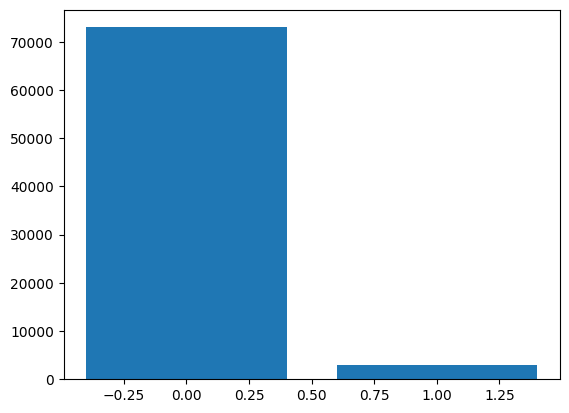

In [14]:
# Calculate the frequency of each unique value in the 'TARGET' column
a = train_df['TARGET'].value_counts()

# Create a bar plot using the calculated frequencies
plt.bar(a.index, a)


In [63]:
a

0    73012
1     3008
Name: TARGET, dtype: int64

In [15]:
# Iterate over each column in the 'train_df' DataFrame
for i in train_df.columns:
    # Check if the column has only one unique value
    if train_df[i].nunique() == 1:
        # Print the column name
        print(i)

        # Drop the column from 'train_df'
        train_df.drop(i, inplace=True, axis=1)

        # Drop the column from 'test_df'
        test_df.drop(i, inplace=True, axis=1)


ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [16]:
print(train_df.shape)
print(test_df.shape)

(76020, 337)
(75818, 336)


In [17]:
# Drop the 'ID' column from the train_df DataFrame
train_df.drop('ID', inplace=True, axis=1)

# Drop the 'ID' column from the test_df DataFrame
test_df.drop('ID', inplace=True, axis=1)


In [19]:
# Create a new DataFrame 'x' by dropping the 'TARGET' column from 'train_df'
x = train_df.drop('TARGET', axis=1)

# Create a new Series 'y' containing only the 'TARGET' column from 'train_df'
y = train_df['TARGET']


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# xtrain: Training features
# xtest: Testing features
# ytrain: Training target variable
# ytest: Testing target variable
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=20)


In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [24]:
# Initialize an empty dictionary 'd' to store evaluation metrics
d = {'model': [], 'TP': [], 'FN': [], 'FP': [], 'TN': [], 'Acc': [], 'AUC': []}

def eval_func(model, model_name, xtest, ytest, ypred):
    """
    Function to evaluate a model's performance and store the evaluation metrics in the dictionary 'd'.

    Parameters:
    - model: The trained model to evaluate.
    - model_name: Name of the model.
    - xtest: Testing features.
    - ytest: Testing target variable.
    - ypred: Predicted target variable.
    """

    # Calculate the confusion matrix
    cm = confusion_matrix(ytest, ypred)
    print(cm)

    # Generate the classification report
    cr = classification_report(ytest, ypred, zero_division=0)
    print(cr)

    # Calculate the AUC score
    auc_score = roc_auc_score(ytest, model.predict_proba(xtest)[:, 1])
    print(auc_score)

    # Calculate the accuracy score
    ar = accuracy_score(ytest, ypred)
    print(ar)

    # Store the evaluation metrics in the dictionary 'd'
    d['model'].append(model_name)
    d['TP'].append(cm[0, 0])
    d['FN'].append(cm[0, 1])
    d['FP'].append(cm[1, 0])
    d['TN'].append(cm[1, 1])
    d['Acc'].append(ar)
    d['AUC'].append(auc_score)


In [25]:
def plot_roc_auc(model, ytest):
    """
    Function to plot the ROC curve and calculate the AUC score for a model.

    Parameters:
    - model: The trained model.
    - ytest: Testing target variable.
    """

    # Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
    fpr, tpr, thresh = roc_curve(ytest, model.predict_proba(xtest)[:, 1])

    # Calculate the AUC score
    auc_score = roc_auc_score(ytest, model.predict_proba(xtest)[:, 1])
    print('Area under curve:', auc_score)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='orange')

    # Plot the diagonal line representing the random classifier
    plt.plot([0, 1], [0, 1])


In [26]:
def plot_roc_auc(model, ytest):

    #Function to plot the ROC curve and calculate the AUC score for a model.

    # Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
    fpr, tpr, thresh = roc_curve(ytest, model.predict_proba(xtest)[:, 1])

    # Calculate the AUC score
    auc_score = roc_auc_score(ytest, model.predict_proba(xtest)[:, 1])
    print('Area Under Curve:', auc_score)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='orange')

    # Plot the diagonal line representing the random classifier
    plt.plot([0, 1], [0, 1], label='TPR=FPR')

    # Set the title, x-axis label, and y-axis label of the plot
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    # Add a grid to the plot
    plt.grid()

    # Add a legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

In [27]:
def mscore(model):
    print('Training Score',model.score(xtrain,ytrain))  # Training dataset Accuracy
    print('Testing Score',model.score(xtest,ytest))

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg = LogisticRegression(max_iter=100000,solver='liblinear')
log_reg.fit(xtrain,ytrain)

LogisticRegression(max_iter=100000, solver='liblinear')

In [30]:
mscore(log_reg)

Training Score 0.9599541474048183
Testing Score 0.961545207401561


In [31]:
# Generating prediction
ypred_logreg = log_reg.predict(xtest)
print(ypred_logreg)

[0 0 0 ... 0 0 0]


In [32]:
eval_func(log_reg,'Log_Reg',xtest,ytest,ypred_logreg)

[[21929     0]
 [  877     0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806

0.6025834489278735
0.961545207401561


Area Under Curve 0.6025834489278735


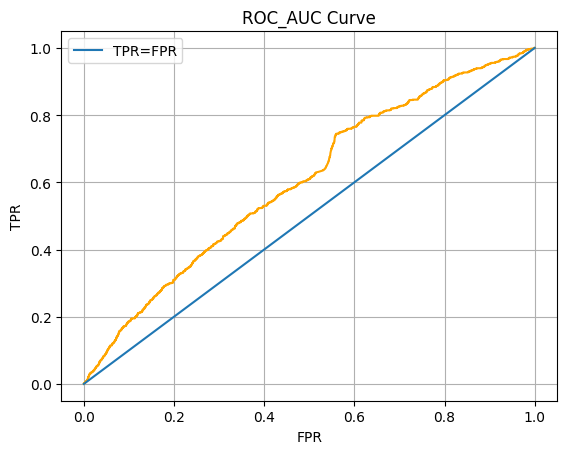

In [33]:
plot_roc_auc(log_reg,ytest)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt= DecisionTreeClassifier(criterion= 'gini',min_samples_split=50 ,max_depth= 10)


In [36]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [37]:
mscore(dt)

Training Score 0.9614950952756793
Testing Score 0.9606682451986319


In [38]:
ypreddt= dt.predict(xtest)

In [39]:
eval_func(dt,'dt',xtest,ytest,ypreddt)

[[21902    27]
 [  870     7]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.21      0.01      0.02       877

    accuracy                           0.96     22806
   macro avg       0.58      0.50      0.50     22806
weighted avg       0.93      0.96      0.94     22806

0.8152916328445283
0.9606682451986319


Area Under Curve 0.8152916328445283


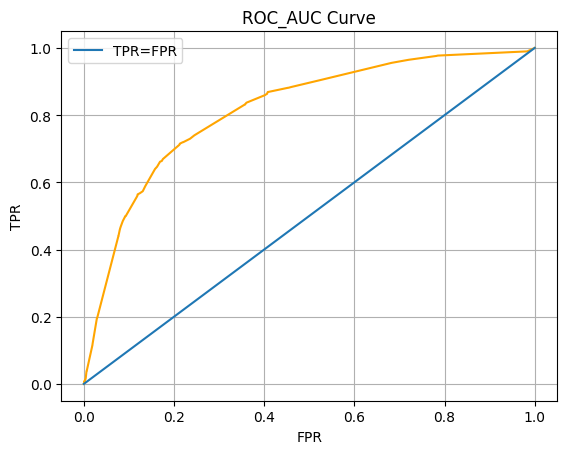

In [40]:
plot_roc_auc(dt,ytest)

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
adab= AdaBoostClassifier(n_estimators=70)

In [43]:
adab.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=70)

In [44]:
mscore(adab)

Training Score 0.9600105235464351
Testing Score 0.9611944225203893


In [45]:
ypredadab=adab.predict(xtest)

In [46]:
eval_func(adab,'adab',xtest,ytest,ypredadab)

[[21916    13]
 [  872     5]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.28      0.01      0.01       877

    accuracy                           0.96     22806
   macro avg       0.62      0.50      0.50     22806
weighted avg       0.94      0.96      0.94     22806

0.8218274192970545
0.9611944225203893


Area Under Curve 0.8218274192970545


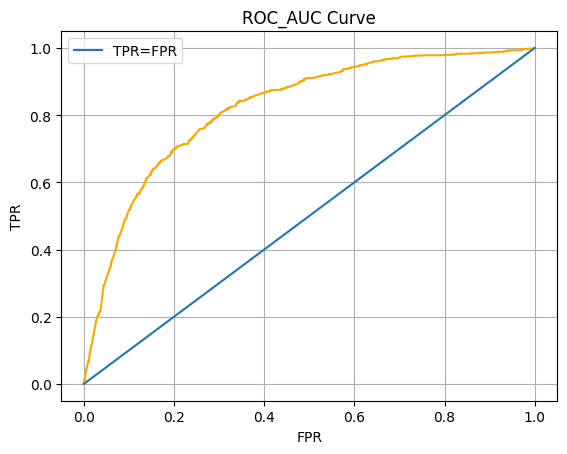

In [47]:
plot_roc_auc(adab,ytest)

In [48]:
print(d)

{'model': ['Log_Reg', 'dt', 'adab'], 'TP': [21929, 21902, 21916], 'FN': [0, 27, 13], 'FP': [877, 870, 872], 'TN': [0, 7, 5], 'Acc': [0.961545207401561, 0.9606682451986319, 0.9611944225203893], 'AUC': [0.6025834489278735, 0.8152916328445283, 0.8218274192970545]}


In [49]:
# Create a DataFrame 'modelper' from the dictionary 'd'
modelper = pd.DataFrame(d)


In [50]:
modelper

,model,TP,FN,FP,TN,Acc,AUC
0,Log_Reg,21929,0,877,0,0.961545,0.602583
1,dt,21902,27,870,7,0.960668,0.815292
2,adab,21916,13,872,5,0.961194,0.821827


In [72]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier with 70 estimators
model = AdaBoostClassifier(n_estimators=70)

# Fit the model to the training data
model.fit(x, y)


AdaBoostClassifier(n_estimators=70)

In [87]:
import pickle
# Save the trained model to a file using pickle
pickle.dump(model, open('sat_predict.pkl', 'wb'))

from google.colab import files
# Download the model file
#files.download('sat_predict.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
# Load the trained model from the pickle file
loaded_model = pickle.load(open('sat_predict.pkl', 'rb'))




In [77]:
# Use the loaded model to predict the target variable for the test data
ypredsat = loaded_model.predict(test_df)
ypredsat

In [81]:
# Read the sample submission file into a DataFrame
predictionsample = pd.read_csv('/content/gdrive/My Drive/sample_submission.csv')

# Assign the predicted values to the 'TARGET' column in the sample DataFrame
predictionsample['TARGET'] = ypredsat



In [83]:
sample_predictions = predictionsample.sample(20)
